In [1]:
# 1. Import Libraries
# -----------------------------
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
    roc_curve,
    auc
)

In [12]:
# 2. Load saved model and vectorizer
model = joblib.load("../results/model.pkl")
vectorizer = joblib.load("../results/vectorizer.pkl")

In [13]:
# 3. Load test dataset (created in 03_model_training.ipynb)
test_data = pd.read_csv("../data/processed/Combined_Data_Cleaned.csv")

In [14]:
# 4. Prepare features for test set
X_test = vectorizer.transform(test_data["statement"])
y_test = test_data["status"]

In [15]:
# 5. Make predictions
y_pred = model.predict(X_test)

In [16]:
# 6. Evaluation Metrics
print("📊 Model Evaluation on Test Data\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

📊 Model Evaluation on Test Data

Accuracy: 0.7712098369001233

Classification Report:
                       precision    recall  f1-score   support

             Anxiety       0.86      0.75      0.80      3617
             Bipolar       0.95      0.58      0.72      2501
          Depression       0.72      0.74      0.73     15087
              Normal       0.83      0.96      0.89     16039
Personality disorder       0.96      0.35      0.51       895
              Stress       0.77      0.32      0.45      2293
            Suicidal       0.69      0.72      0.70     10641

            accuracy                           0.77     51073
           macro avg       0.82      0.63      0.69     51073
        weighted avg       0.78      0.77      0.76     51073



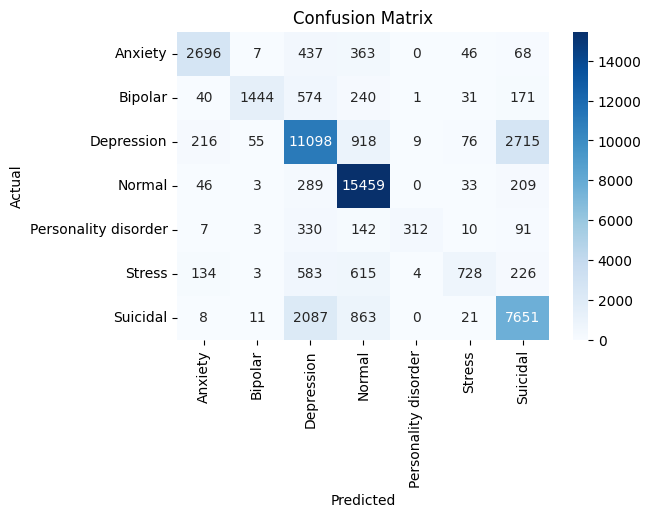

In [17]:
# 7. Confusion Matrix (Heatmap)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [18]:
# 8. Save evaluation results to a text file
with open("../results/evaluation_report.txt", "w") as f:
    f.write("Accuracy: " + str(accuracy_score(y_test, y_pred)) + "\n\n")
    f.write("Classification Report:\n" + classification_report(y_test, y_pred))